# Business Understanding
SyriaTel, a telecommunications company is interested in knowing whether a customer will stop doing business with the company. This will help the business in reducing the on money lost because of customers who do not stick around very long.
We will use a classifier model to see whether there are any predicable patterns which in turn will assist Syriatel to have a clear picture of the churn rate.


## Import necessary modules

These modules will be used to prepare the data and model development

In [36]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

# Data Understanding

In [2]:
#import the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

From df.info(), the dataset has 21 columns and 3333 rows. We also observe that there are no null values in the dataset

In [5]:
df['churn'].value_counts() 

churn
False    2850
True      483
Name: count, dtype: int64

The number of people who churn are less compared to those who do not churn therefore we are dealing with an imbalanced dataset

In [6]:
# to analyse which object variable can be used in the model
df.select_dtypes("object").nunique().sort_values()

international plan       2
voice mail plan          2
state                   51
phone number          3333
dtype: int64

In [63]:
nums = df.select_dtypes('number')
nums.head()

state_MI                  2
state_MO                  2
state_MS                  2
state_MT                  2
state_NC                  2
                       ... 
total intl minutes      162
account length          212
total night minutes    1591
total eve minutes      1611
total day minutes      1667
Length: 65, dtype: int64

# Data Preparation

## One-Hot Ecoding
From above analysis international plan,  voice mail plan, state and area code are categorical features we need to encoode them as numbers

In [9]:
df = pd.get_dummies(df, columns=['state', 'area code', 'international plan', 'voice mail plan'], dtype=int, drop_first=True)
df.head()

,account length,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,1,0,0,1
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,1,0,0,1
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,1,0,0,0
3,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,1,0,1,0


## Drop unnecessary columns

In [10]:
# the phone number  may not help in predicting churn rate and has 3333 unique values and will make our model more complex. So drop the column

df = df.drop(columns=['phone number'])


## Check for and removing Multicollinearity

In [12]:
#check for numerical variables that are highly correlated. where two variable are highly correlated, we will remove one of them 

nums = nums.drop(columns=['area code'])
nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

<Axes: >

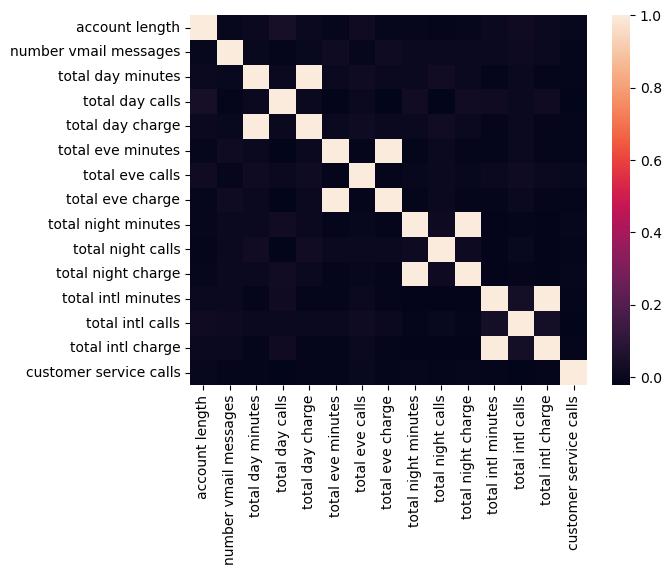

In [17]:
sns.heatmap(nums.corr())


In [18]:
#variables that are highly correlated are total day charge & total day calls, total eve charge & total eve calls, total night charge & total night call, total intl charge & total intl calls

# we drop the columns with total day, eve, night & intl charges

df = df.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 66 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total eve minutes       3333 non-null   float64
 5   total eve calls         3333 non-null   int64  
 6   total night minutes     3333 non-null   float64
 7   total night calls       3333 non-null   int64  
 8   total intl minutes      3333 non-null   float64
 9   total intl calls        3333 non-null   int64  
 10  customer service calls  3333 non-null   int64  
 11  churn                   3333 non-null   bool   
 12  state_AL                3333 non-null   int32  
 13  state_AR                3333 non-null   int32  
 14  state_AZ                3333 non-null   

## Train - Test Split the dataset

In [19]:
#split the dataset into train and test sets

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalize the numeric data

In [20]:
#scale the features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



# Modelling

## Build a vanilla logistic regression model


In [29]:
#Build a classifier 

#Instantiate the model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Generate predictions for the test set
y_test_pred = model.predict(X_test)

### Calculate and evaluate the metrics using Classification report

In [68]:
# Calculate and evaluate the metrics using Classification report

from sklearn.metrics import classification_report

report = classification_report(y_true=y_test, y_pred=y_test_pred)
print(report)

              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.58      0.21      0.31       101

    accuracy                           0.86       667
   macro avg       0.73      0.59      0.61       667
weighted avg       0.83      0.86      0.83       667



## Build a logistic regression model with SMOTE

In [24]:
# We had noted earlier that this is an imbalanced dataset therefore we need to SMOTE to address the class imbalance

from imblearn.over_sampling import SMOTE

In [25]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

y_train_smote.value_counts()

churn
False    2284
True     2284
Name: count, dtype: int64

In [31]:
#Instantiate the model
model2 = LogisticRegression()

# Fit the model
model2.fit(X_train_smote, y_train_smote)

# Generate predictions for the test set
y_pred_smote = model2.predict(X_test)

In [32]:
# Calculate and evaluate the metrics using Classification report
report2 = classification_report(y_true=y_test, y_pred=y_pred_smote)
print(report2)

              precision    recall  f1-score   support

       False       0.94      0.80      0.86       566
        True       0.39      0.73      0.51       101

    accuracy                           0.79       667
   macro avg       0.67      0.76      0.69       667
weighted avg       0.86      0.79      0.81       667



In [33]:
# AUC & ROC Curve

#AUC without smote

from sklearn.metrics import roc_curve, auc

fpr1,tpr1,_ = roc_curve(y_true=y_test, y_score=model.decision_function(X_test))
area = auc(fpr1,tpr1)
area

0.8165168106916699

In [34]:
# AUC & ROC Curve

#With smote
fpr2,tpr2,_ = roc_curve(y_true=y_test, y_score=model2.decision_function(X_test))
area2 = auc(fpr2,tpr2)
area2

0.8218346569639298

## Decision Tree

In [45]:
# Decision trees

#Create the classifier, fit it on the training data and make predictions on the test set

clf = DecisionTreeClassifier(random_state=10, criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [47]:
#Evaluate the predictive performance

y_pred_clf = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_clf))

Accuracy:  0.9205397301349325


In [53]:
# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_clf)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8515026414302208

## Hyperparameter Tuning and Pruning the Decision tree

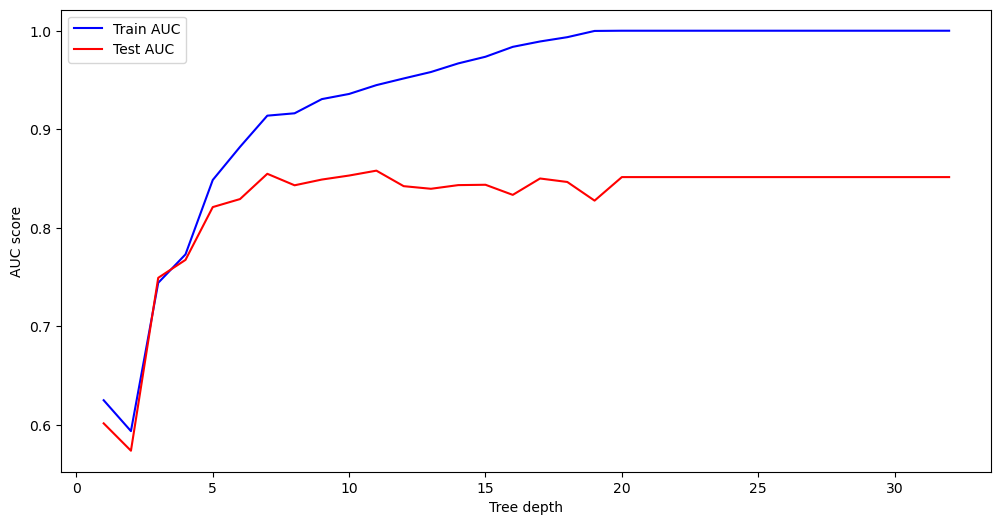

In [54]:
#Hyperparameter tuning using max_depth
# Identify the optimal tree depth for given data 
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=10)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

Training and test errors rise rapidly between the depths of 2 and 3. We choose our Max_depth as 3

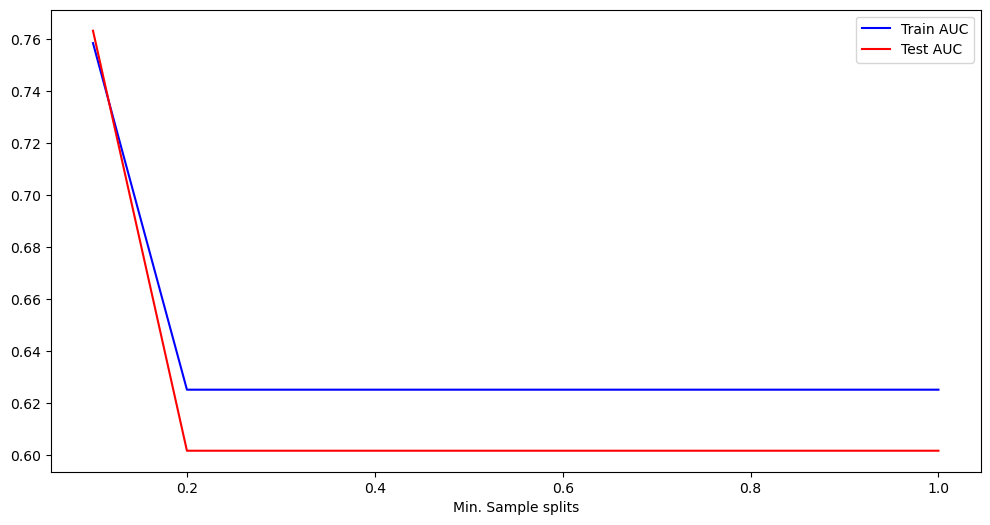

In [55]:
# Hyperparameter tuning using min_samples_split
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=10)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'b', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

AUC for both test and train data stabilizes at 0.2 therefore the min_samples_split will be 0.2

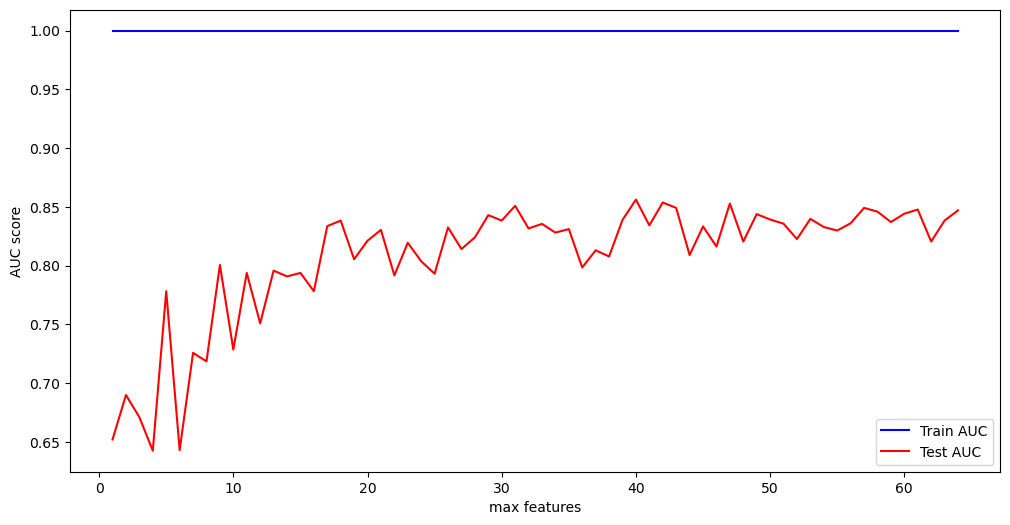

In [58]:
# Hyperparameter tuning using max_features
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    clf = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=10)
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'b', label='Train AUC')
plt.plot(max_features, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

The highest AUC value is seen at 40 therefore we will choose max_features = 40

In [65]:
# Train a classifier with optimal values identified above
dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=40,
                           max_depth=3,
                           min_samples_split=0.2, 
                           random_state=10)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7256236224329147

# Evaulating

## Logistic regression
We evaluated the the logistic regression models using the classification report (where we were interested in the accuracy score) and we also added the AUC for comparison but this being an imbalance dataset, the AUC will be more suitable as measure.

Vanilla Logistic regression(without SMOTE)
    
    AUC - 0.81

Logistic regression with SMOTE
    
    AUC - 0.82

Based on the AUC results above we can see there was a slight increase which means the model performance improved with SMOTE

## Decision tree

We have the decision tree using AUC both for the vanilla decison tree and decision tree with hyperparemeter tuning and pruning.

Vanilla Decision tree
    
    AUC - 0.85
    
Decision tree with hyperparemeter tuning and pruning

    AUC - 0.72
    
Based on the AUC results above, there was a reduction in AUC which means the decision tree did not perform better with hyperparemeter tuning and pruning

# Deployement/Conclusion

Overall the Logistic regression with SMOTE performance tells us that the model can be used as good predictor of the churn rate for SyriaTel telecommunications company 